# Plot recent seismicity

Script to plot locations and magnitudes of shallow (<30 km depth) events from Geonet catalogue since AD 1940. 

Makes figures like 2c, 3a and 8a of Shaw et al., 2021



Import required modules and specify plotting font/font sizes

In [1]:
import os
import pandas as pd

import geopandas as gpd
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np

from rsqsim_api.fault.multifault import RsqSimMultiFault
from rsqsim_api.catalogue.catalogue import RsqSimCatalogue
from rsqsim_api.visualisation.utilities import plot_coast, format_label_text_wgs

# Plotting parameters

params = {'axes.labelsize': 12,
          'axes.titlesize': 12,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'font.family': 'serif',
          'font.serif': "CMU Serif",
          'font.size': 12,
          'xtick.direction': "in",
          'ytick.direction': 'in',
          'xtick.top': True,
          'ytick.right': True
          }
mpl.rcParams.update(params)


Specify data location and read and filter catalogue

In [2]:
# Location of catalogue relative to current working directory
catalogue_file = "../../data/shaw2021/databases/earthquakesNZ_shallowM4.csv"
# Read in data
seismicity = pd.read_csv(catalogue_file)
# Filter data to be younger than 1940
since_1940 = seismicity[(seismicity.origintime > "1940-01-01T00:00:00") & (seismicity.magnitude >= 4.0)]

# Boundaries of plot
x1 = 160.
x2 = 185.
y1 = -51.
y2 = -33.001

# Catalogue data are in seconds, but desirable to plot in years
seconds_per_year = 31557600.0


Create and save the plots

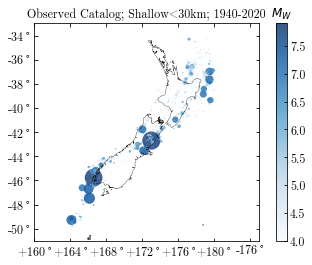

In [3]:
# Create figure object
fig, ax = plt.subplots()
cmap = ax.scatter(since_1940.longitude, since_1940.latitude, marker='o', 
                  s=10**since_1940.magnitude / 2.e5,  # Size scaling is by 10**mw
                  c=since_1940.magnitude,  # Colour scaling by magnitude
                  cmap="Blues", vmin=4, vmax=7.9, linewidth=0, alpha=0.8)

# Plot coastline
plot_coast(ax=ax, edgecolor="k", wgs=True, coarse=True)

# Trim plot to area of interest
ax.set_xlim(([x1, x2]))
ax.set_ylim(([y1, y2]))

# Make labelling prettier (and add degree symbols)
format_label_text_wgs(ax, xspacing=4, yspacing=2)

# Intervals of ticks on colourbar
cbar_ticks = np.arange(4, 7.9, 0.5)

# Plot colourbar
colorbar = plt.colorbar(cmap, ax=ax, ticks=cbar_ticks)
colorbar.ax.set_title("$M_W$")

# Title
ax.set_title('Observed Catalog; Shallow<30km; 1940-2020')

# Save figure
plt.savefig(f"recent_shallow_seismicity.png")